<a href="https://colab.research.google.com/github/NAVEENKUMAR097/PROJECT/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME : S. NAVEEN KUMAR

> BATCH : D14



**CHENNAI HOUSE PRICE PREDICTION**

**IMPORTING NECESSARY PACKAGES**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



**Creating dataframe for dataset**

In [ ]:
data = pd.read_csv('/content/train-chennai-sale.csv')
data.head(10)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
5,P00219,Chrompet,1220,11-09-2014,36,2.0,1.0,4,Partial,No,...,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750
6,P09105,Chrompet,1167,05-04-2007,137,1.0,1.0,3,Partial,No,...,AllPub,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790
7,P09679,Velachery,1847,13-03-2006,176,3.0,2.0,5,Family,No,...,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,604809,235204,16800250
8,P03377,Chrompet,771,06-04-2011,175,1.0,1.0,2,AdjLand,No,...,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,257578,33236,8308970
9,P09623,Velachery,1635,22-06-2006,74,2.0,1.0,4,AbNormal,No,...,ELO,No Access,I,3.1,3.1,3.3,3.160,323346,121255,8083650


In [ ]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

**DROPING UNWANTED FEATURE**

In [ ]:
data = data.drop(['PRT_ID'],axis = 1)
data = data.drop(['REG_FEE','COMMIS'],axis = 1)

**DATA CLEANING**

**SPELLING CORRECTION FOR ALL CATEGORICAL COLUMN**

In [ ]:
data['SALE_COND'].replace(['Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'],['AbNormal','Partial','AdjLand','Partial'],  inplace = True )
data['AREA'] = data['AREA'].str.lower()
data['AREA'].replace(['karapakam','ana nagar','ann nagar','adyr','velchery','chrompt','chrmpet','chormpet','kknagar','tnagar'],['karapakkam','anna nagar','anna nagar','adyar','velachery','chrompet','chrompet','chrompet','kk nagar','t nagar'],inplace = True)
data['UTILITY_AVAIL'] = data['UTILITY_AVAIL'].str.lower()
data['UTILITY_AVAIL'].replace(['allpub','nosewa'],['all pub','nosewr'],inplace = True)
data['BUILDTYPE'] = data['BUILDTYPE'].str.lower()
data['BUILDTYPE'].replace(['comercial','other'],['commercial','others'],inplace = True)
data['STREET'] = data['STREET'].str.lower()
data['STREET'].replace(['pavd','noaccess'],['paved','no access'], inplace = True)
data['PARK_FACIL'] = data['PARK_FACIL'].str.lower()
data['PARK_FACIL'].replace(['noo'],['no'], inplace = True)

In [ ]:
data['AREA'].replace(['karapakam','ana nagar','ann nagar','adyr','velchery','chrompt','chrmpet','chormpet','kknagar','tnagar'],['karapakkam','anna nagar','anna nagar','adyar','velachery','chrompet','chrompet','chrompet','kk nagar','t nagar'],inplace = True)

**CHANGING THE DATE_SALE AND DATE_BULID COLUMN TO DATETIME DATATYPE**

In [ ]:
data['DATE_SALE'] = pd.to_datetime(data['DATE_SALE'])
data['DATE_BUILD'] = pd.to_datetime(data['DATE_BUILD'])
data.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM               float64
N_BATHROOM              float64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
dtype: object

TAKING YEAR ALONE FORM THE BOTH COLUMN 

In [ ]:
data['SALE_YEAR'] = data['DATE_SALE'].dt.year
data['BULID_YEAR'] = data['DATE_BUILD'].dt.year
data1 = data.copy()
data1

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,SALE_YEAR,BULID_YEAR
0,karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,yes,1967-05-15,...,all pub,paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967
1,anna nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,no,1995-12-22,...,all pub,gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995
2,adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,yes,1992-09-02,...,elo,gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992
3,velachery,1855,2010-03-13,14,3.0,2.0,5,Family,no,1988-03-18,...,nosewr,paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988
4,karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,yes,1979-10-13,...,all pub,gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,karapakkam,598,2011-03-01,51,1.0,1.0,2,AdjLand,no,1962-01-15,...,elo,no access,RM,3.0,2.2,2.4,2.520,5353000,2011,1962
7105,velachery,1897,2004-08-04,52,3.0,2.0,5,Family,yes,1995-11-04,...,nosewr,no access,RH,3.6,4.5,3.3,3.920,10818480,2004,1995
7106,velachery,1614,2006-08-25,152,2.0,1.0,4,Normal Sale,no,1978-01-09,...,nosewr,gravel,I,4.3,4.2,2.9,3.840,8351410,2006,1978
7107,karapakkam,787,2009-03-08,40,1.0,1.0,2,Partial,yes,1977-11-08,...,elo,paved,RL,4.6,3.8,4.1,4.160,8507000,2009,1977


DROPING THE DATESALE AND DATEBLUID COLUMN 

In [ ]:
data1 = data1.drop(['DATE_SALE','DATE_BUILD'],axis = 1)


**CHECKING FOR NULL VALUES**

In [ ]:
data1.isnull().sum()

AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
SALE_YEAR         0
BULID_YEAR        0
dtype: int64

**FILLING THE NULL VALUES**

In [ ]:
data1['N_BEDROOM']=data1['N_BEDROOM'].fillna(data1['N_BEDROOM'].mean())
data1['N_BATHROOM']=data1['N_BATHROOM'].fillna(data1['N_BATHROOM'].mean())
data1['QS_OVERALL'] = data1['QS_OVERALL'].fillna(data1['QS_OVERALL'].mean())

data1['N_BEDROOM'] = np.floor(data1['N_BEDROOM'])
data1['N_BATHROOM'] = np.floor(data1['N_BATHROOM'])

In [ ]:

data1.isnull().sum()



AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
SALE_YEAR        0
BULID_YEAR       0
dtype: int64

CREATING NEW COLUMN HOUSE AGE

In [ ]:
data1['HOUSE AGE'] = data1['SALE_YEAR'] - data1['BULID_YEAR']
data1['HOUSE AGE']

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: HOUSE AGE, Length: 7109, dtype: int64

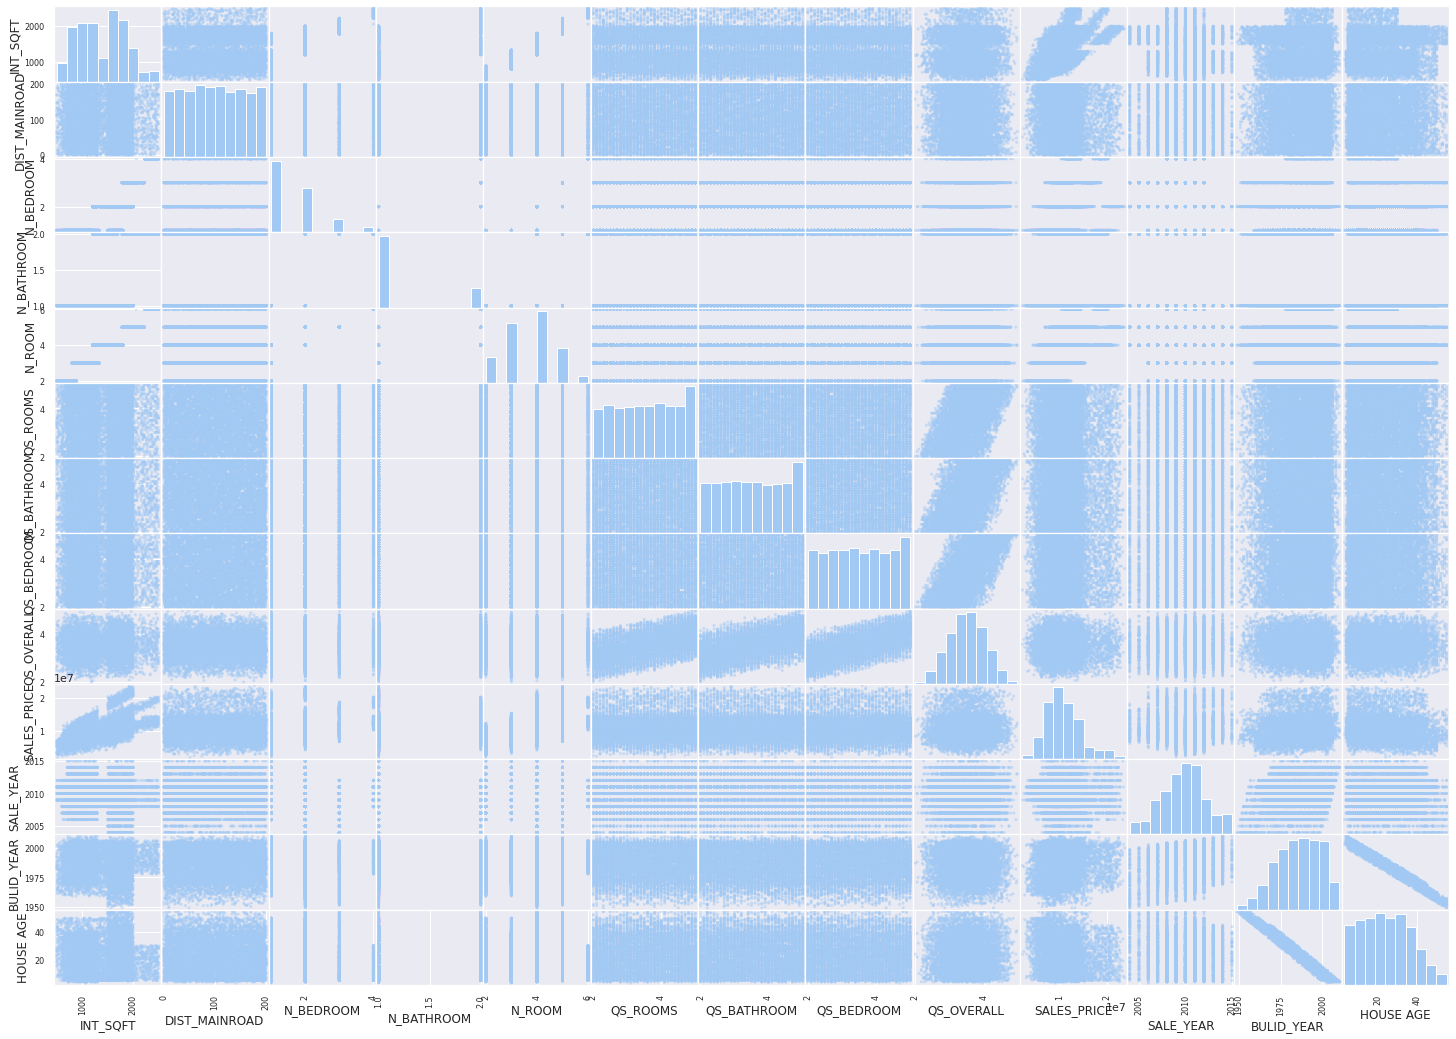

In [ ]:
scatter_matrix(data1)
fig = plt.gcf()
fig.set_size_inches(25, 18)
plt.show()


**UNIVARIATE ANALYSIS FOR THE FEATURES**

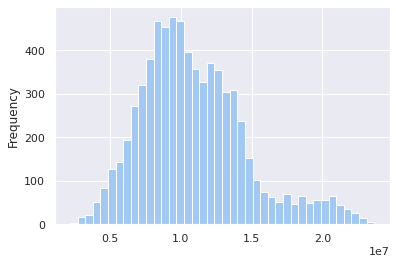

In [ ]:
data1['SALES_PRICE'].plot.hist(bins = 40)

FROM THE ABOVE PLOT:
   -THERE IS SKEWED NORMAL DISTRIBUTION 

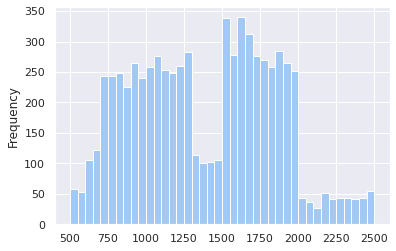

In [ ]:
data1['INT_SQFT'].plot.hist(bins = 40)

FROM THE ABOVE PLOT:
  -THERE IS NO NORMAL DISTRIBUTION 

Text(0, 0.5, 'NO OF HOUSES')

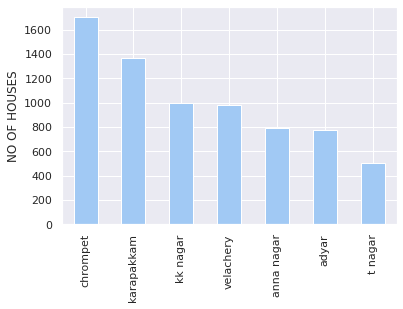

In [ ]:
data1['AREA'].value_counts().plot.bar()
plt.ylabel('NO OF HOUSES')

FROM THE ABOVE PLOT:
  -CHROMPET HAS HIGHEST NO OF HOUSES 
  -TNAGAR HAS LOWEST NO OF HOUSES

In [ ]:
data1['AREA'].value_counts()/len(data)*100

chrompet      23.941483
karapakkam    19.215079
kk nagar      14.024476
velachery     13.799409
anna nagar    11.084541
adyar         10.887607
t nagar        7.047405
Name: AREA, dtype: float64

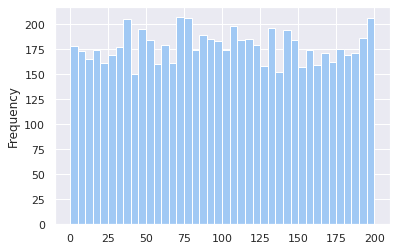

In [ ]:
data1['DIST_MAINROAD'].plot.hist(bins = 40)

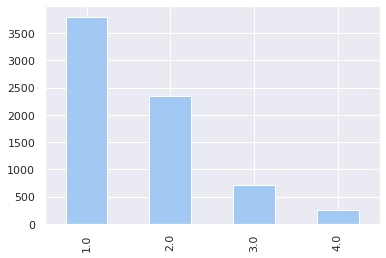

In [ ]:
data1['N_BEDROOM'].value_counts().plot.bar()

FROM ABOVE PLOT

> -SINGLE BEDROOM HAVE HIGHEST NO OF HOUSES(53%)

> -FOUR BEDROOM HAVE LOWEST NO OF HOUSES(3%)




  -



In [ ]:
data1['N_BEDROOM'].value_counts()/len(data1)*100

1.0    53.397102
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: N_BEDROOM, dtype: float64

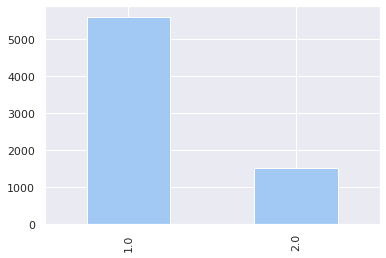

In [ ]:
data1['N_BATHROOM'].value_counts().plot.bar()

FROM ABOVE PLOT

1.   MOST OF THE HOUSES HAVE ONLY ONE BATHROOM





In [ ]:
data1['N_BATHROOM'].value_counts()/len(data1)*100

1.0    78.688986
2.0    21.311014
Name: N_BATHROOM, dtype: float64

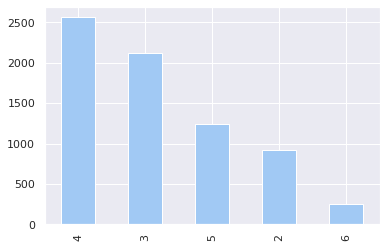

In [ ]:
data1['N_ROOM'].value_counts().plot.bar()

FROM THE ABOVE PLOT:

*   MORE THAN 36% OF THE HOUSES HAVE 4 ROOMS AND 28% HAVE 3 ROOMS
   




In [ ]:
data1['N_ROOM'].value_counts()/len(data1)*100

4    36.052891
3    29.891687
5    17.527078
2    12.955409
6     3.572936
Name: N_ROOM, dtype: float64

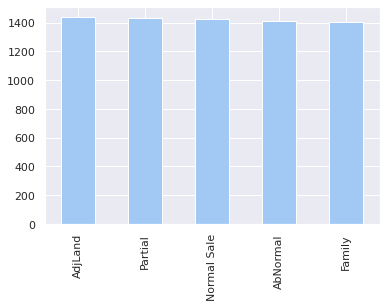

In [ ]:
data1['SALE_COND'].value_counts().plot.bar()

FROM THE ABOVE PLOT

*   EVERYTHING IS EQUALLY DISTRIBUTED


In [ ]:
data1['SALE_COND'].value_counts()/len(data1)*100

AdjLand        20.241947
Partial        20.157547
Normal Sale    20.016880
AbNormal       19.848080
Family         19.735546
Name: SALE_COND, dtype: float64

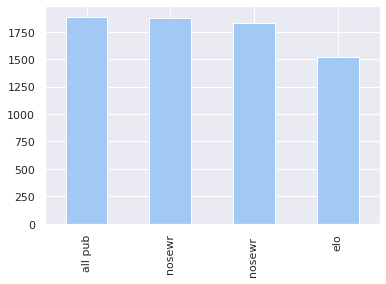

In [ ]:
data1['UTILITY_AVAIL'].value_counts().plot.bar()

In [ ]:
data1['UTILITY_AVAIL'].value_counts()/len(data1)*100

all pub    26.543818
nosewr     26.318751
nosewr     25.727950
elo        21.409481
Name: UTILITY_AVAIL, dtype: float64

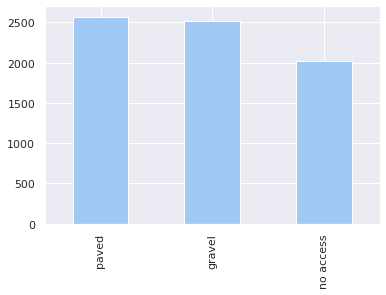

In [ ]:
data1['STREET'].value_counts().plot.bar()

In [ ]:
data1['STREET'].value_counts()/len(data1)*100

paved        36.179491
gravel       35.448024
no access    28.372486
Name: STREET, dtype: float64

**BIVARIATE ANALYSIS**

FEATURE VS SALESPRICE

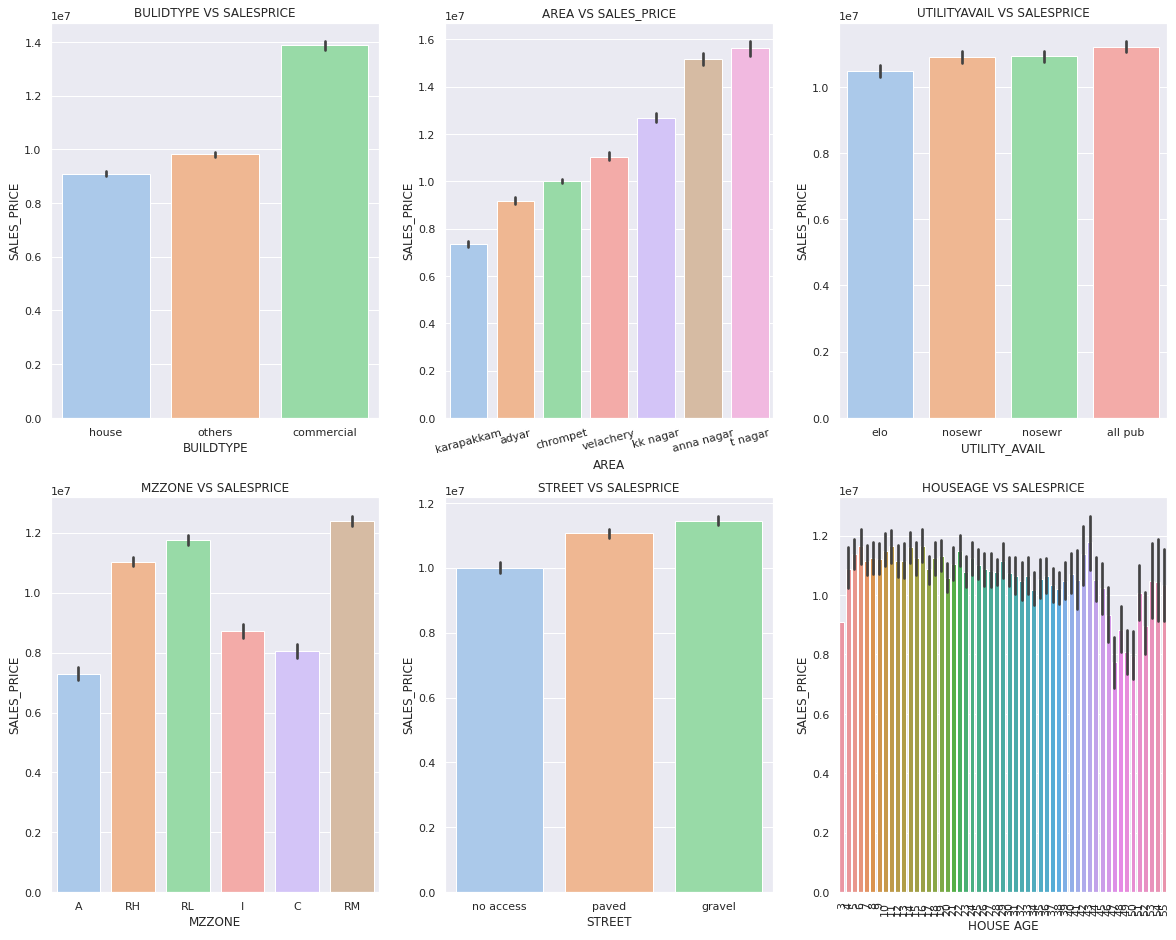

In [ ]:
sns.set_theme(style = "darkgrid",palette= 'pastel')
fig = plt.gcf()
fig.set_size_inches(20,16)
plt.subplot(2,3,2)
sns.barplot(x= data1['AREA'],y=data1['SALES_PRICE'],data = data1,order=data1.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.xticks(rotation=15)
plt.title('AREA VS SALES_PRICE')
plt.subplot(2,3,1)
sns.barplot(x=data1['BUILDTYPE'],y=data1['SALES_PRICE'],data = data1,order=data1.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('BULIDTYPE VS SALESPRICE')
plt.subplot(2,3,3)
sns.barplot(x=data1['UTILITY_AVAIL'],y=data1['SALES_PRICE'],data = data1,order=data1.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('UTILITYAVAIL VS SALESPRICE')
plt.subplot(2,3,4)
sns.barplot(x=data1['MZZONE'],y=data1['SALES_PRICE'],data = data1)
plt.title('MZZONE VS SALESPRICE')
plt.subplot(2,3,5)
sns.barplot(x='STREET',y='SALES_PRICE',data=data1,order=data1.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title('STREET VS SALESPRICE')
plt.subplot(2,3,6)
sns.barplot(x = data1['HOUSE AGE'], y = data1['SALES_PRICE'],data = data1)
plt.xticks(rotation = 90)
plt.title('HOUSEAGE VS SALESPRICE')
plt.show()


FROM THE ABOVE PLOTS:


*   THERE IS NO LINEAR RELATIONSHIP IN BULIDTYPE VS SALESPRICE
*   THERE IS LINEAR RELATIONSHIP IN AREA VS SALESPRICE 

*   HERE ALSO LINEAR RELATIONSHIP IN UTILITYAVAIL VS SALESPRICE
*   THRER IS NO LINEAR RELATIONSHIP IN MZZONE VS SALESPRICE 

*   THERE IS LINEAR RELATIONSHIP IN STREET VS SALESPRICE 
*   IN T NAGAR AREA THE SALESPRICE IS HIGHER AND IN KARAPAKKAM AREA THE SALESPRICE IS LOWER 

*   COMMERCIAL TYPE BULIDING HAS HIGHEST SALESPRICE 
*   BULIDING IN GRAVEL TYPE STREET ARE HIGHER SALES PRICE THAN OTHER STREET














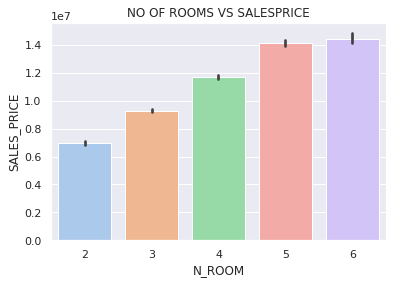

In [ ]:
sns.barplot(x = data1['N_ROOM'], y = data1['SALES_PRICE'],data = data1)
plt.title('NO OF ROOMS VS SALESPRICE')
plt.show()

FROM THE ABOVE PLOT:

*   SALES PRICE IS DIRECTLY PROPORTIONAL TO ROOM WHEN NO OF ROOMS INCREASE SALES PRICE ALSO INCREASES




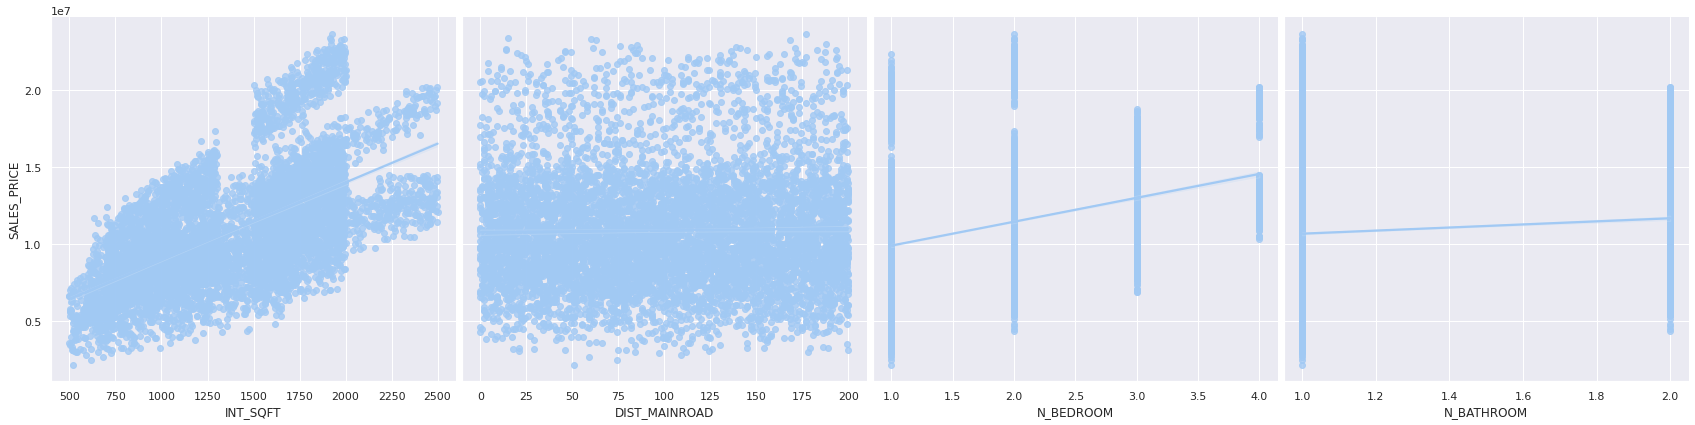

In [ ]:
sns.pairplot(data1,x_vars = ['INT_SQFT','DIST_MAINROAD','N_BEDROOM','N_BATHROOM'], y_vars= ['SALES_PRICE'],height = 6 , kind = 'reg')
plt.show()

FROM THE ABOVE 

1.   THERE IS A LINEAR RELATION FOR INTSQFT AND NBEDROOM WITH SALES PRICE 




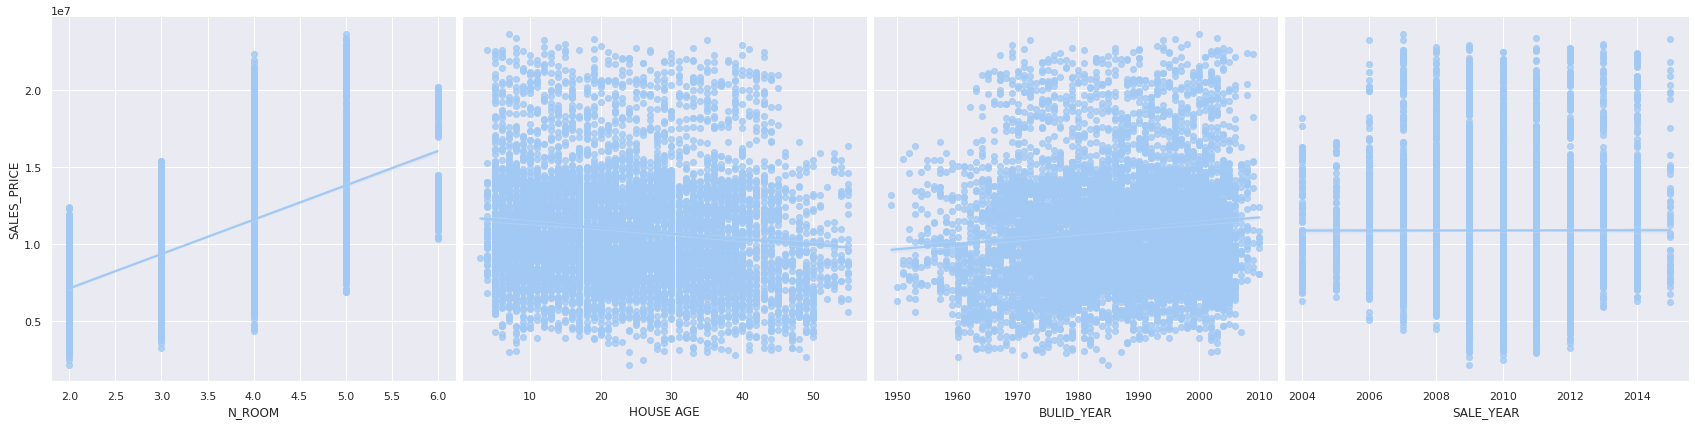

In [ ]:
sns.pairplot(data1, x_vars = ['N_ROOM','HOUSE AGE','BULID_YEAR','SALE_YEAR'], y_vars = ['SALES_PRICE'], height = 6 , kind = 'reg')
plt.show()

FROM THE ABOVE PLOT

1.   ONLY FOR NROOMS THERE IS LINEAR RELATIONSHIP



<function matplotlib.pyplot.show>

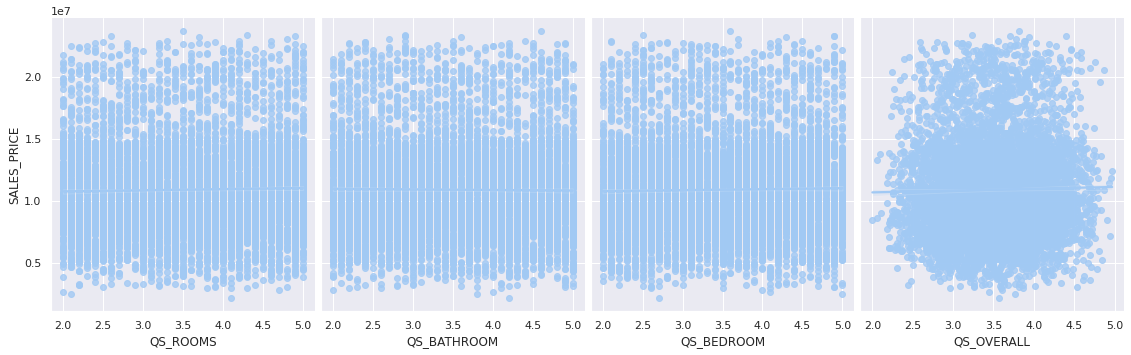

In [ ]:
sns.pairplot(data1,x_vars=["QS_ROOMS", "QS_BATHROOM","QS_BEDROOM","QS_OVERALL"], y_vars=["SALES_PRICE"],height=5, aspect=.8, kind="reg")
plt.show

FROM ABOVE PLOT NO FEATURE HAVE LINEAR RELATIONSHIP WITH TARGET VARIABLE

DROPING THE FEATURES WHICH HAS NO LINEAR RELATIONSHIP WITH TARGET VARIABLE

In [ ]:
data1.drop(["QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL"],axis=1,inplace = True)
data1.drop(["N_BATHROOM"],axis=1,inplace =True)
data1.drop(["SALE_YEAR","BULID_YEAR","HOUSE AGE"],axis=1,inplace =True)

**ENCODING THE CATEGORICAL DATA**

LABEL ENCODING

In [ ]:
data1["AREA"].replace(["karapakkam","adyar","chrompet","velachery","kk nagar","anna nagar","t nagar"],[1,2,3,4,5,6,7],inplace=True)
data1["UTILITY_AVAIL"].replace(["elo","nosewr ","all pub"],[1,2,3],inplace=True)
data1["PARK_FACIL"].replace(["yes","no"],[1,0],inplace=True)
data1["SALE_COND"].replace(["Partial","Family","AbNormal","Normal Sale","AdjLand"],[1,2,3,4,5],inplace=True)
data1["STREET"].replace(["no access","paved","gravel"],[1,2,3],inplace=True)
data1["MZZONE"].replace(["A","C","I","RH","RL","RM"],[1,2,3,4,5,6],inplace =True)

In [ ]:
data1

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,BUILDTYPE_commercial,BUILDTYPE_house,BUILDTYPE_others
0,1,1004,131,1.0,3,3,1,3,2,1,7600000,1,0,0
1,6,1986,26,2.0,5,3,0,3,3,4,21717770,1,0,0
2,2,909,70,1.0,3,3,1,1,3,5,13159200,1,0,0
3,4,1855,14,3.0,5,2,0,2,2,3,9630290,0,0,1
4,1,1226,84,1.0,3,3,1,3,3,2,7406250,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,51,1.0,2,5,0,1,1,6,5353000,0,0,1
7105,4,1897,52,3.0,5,2,1,2,1,4,10818480,0,0,1
7106,4,1614,152,2.0,4,4,0,2,3,3,8351410,0,1,0
7107,1,787,40,1.0,2,1,1,1,2,5,8507000,1,0,0


ONEHOT ENCODING

In [ ]:
data1 = pd.get_dummies(data1, columns = ["BUILDTYPE"])

**SPLITTING THE DATA X AND Y**

In [ ]:
x= data1.drop(['SALES_PRICE'], axis =1)
y = data1['SALES_PRICE']


**SPLITTING DATA FOR TRAIN AND TEST**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

**FEATURE CORRELATION**

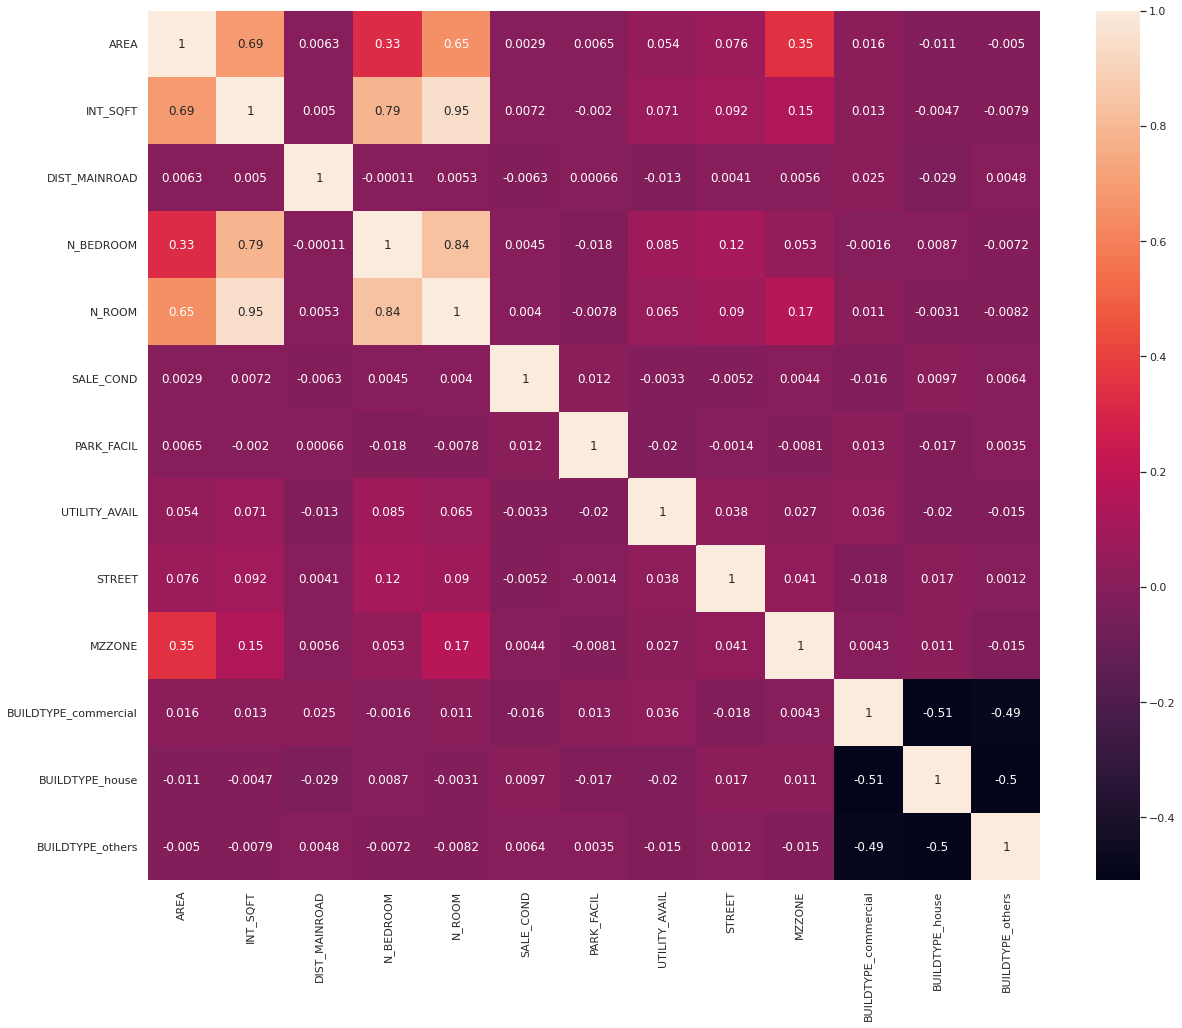

In [ ]:
plt.figure(figsize= (20,16))
sns.heatmap(X_train.corr(),annot= True)

**CHECKING WHICH FEATURE HAS HIGHLY CORRELATION**

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are use absolute() to even focus on -ve coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
cor_feat = correlation(X_train,0.8)
cor_feat

{'N_ROOM'}

DROPING N_ROOM

In [ ]:
new_train = X_train.drop(cor_feat,axis = 1)
new_test = X_test.drop(cor_feat,axis = 1 )


In [ ]:
train = pd.concat([new_train,y_train],axis=1)
test = pd.concat([new_test,y_test],axis=1)
new_data=pd.concat([train,test],axis=0)
new_data.shape

(7109, 13)

In [ ]:
x1 = new_data.drop(['SALES_PRICE'],axis = 1)
y1= new_data['SALES_PRICE']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 12), (1422, 12), (5687,), (1422,))

AREA                    0.430586
INT_SQFT                0.383361
BUILDTYPE_commercial    0.181173
N_BEDROOM               0.171703
MZZONE                  0.146376
BUILDTYPE_house         0.088457
BUILDTYPE_others        0.043567
PARK_FACIL              0.019502
STREET                  0.019438
UTILITY_AVAIL           0.014542
SALE_COND               0.001750
DIST_MAINROAD           0.000000
dtype: float64

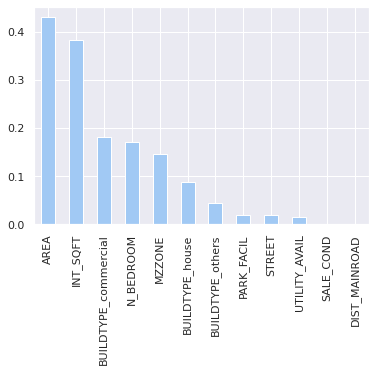

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest, chi2, f_regression
mutual_info = mutual_info_regression(X_train,y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False).plot(kind ="bar")
mutual_info.sort_values(ascending = False)

In [ ]:
x1.drop(["SALE_COND","DIST_MAINROAD"],axis = 1,inplace=True)

**STANDARDIZE THE DATA**


In [ ]:
stand = StandardScaler()
X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
stand_X_train = stand.fit_transform(X_train)
stand_X_test = stand.transform(X_test)



**LINEAR REGRESSION**

In [ ]:
lr_model = LinearRegression()
lr_model.fit(stand_X_train,y_train)


LinearRegression()

In [ ]:
y_pr = lr_model.predict(stand_X_test)
lr_score= lr_model.score
r2_score(y_test,y_pr)


0.8992263244139358

**R2 SCORE FOR LINEAR REGRESSION IS 0.8992263244139358**

**XG BOOST REGRESSOR**

In [ ]:
import xgboost as xg
XG= xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=2,                 
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000, )
XG.fit(stand_X_train,y_train)
xg_y_pred=XG.predict(stand_X_test)
print("XGBoost model Rsquared metric:",r2_score(y_test,xg_y_pred))

[06:58:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost model Rsquared metric: 0.9924605797449981


**R2 SCORE FOR XG BOOST IS 0.9924605797449981**

**RABDOM FOREST REGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators= 1000, max_depth = 10, max_features='sqrt')
RF.fit(stand_X_train, y_train)
rf_pred = RF.predict(stand_X_test)
print("Random forest Regressor model Rsquared metric",r2_score(y_test,rf_pred))

Random forest Regressor model Rsquared metric 0.9841100213120011


**R2 SCORE FOR RANDOM FOREST IS 0.9842020849589967**

**WITH CROSS VALIDATION FOR ALL MODELS**

In [ ]:
from sklearn.model_selection import cross_val_score
CV_Linear_regression = cross_val_score(lr_model,stand_X_train,y_train,cv=10).mean()
print("The cross_validation score of an Linear_Regression model is:",CV_Linear_regression)

The cross_validation score of an Linear_Regression model is: 0.9015935322638002


**cross_validation score of an Linear_Regression model is 0.9015935322638002**

In [ ]:
CV_XG_Boost = cross_val_score(XG,stand_X_train,y_train,cv=10).mean()
print("The cross_validation score of an XG_Boost model is:",CV_XG_Boost)

[06:59:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:59:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:00:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:00:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:00:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:01:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:01:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

**cross_validation score of an XG_Boost model is 0.99219518858302**

In [ ]:
CV_RandomForest = cross_val_score(RF,stand_X_train,y_train,cv=10).mean()
print("The cross_validation score of an RandomForest model is:",CV_RandomForest)

The cross_validation score of an RandomForest model is: 0.9829990698692912


**cross_validation score of an RandomForest model is 0.9829427720101404**

**LINEAR REGRESSION:**

*   R2 SCORE WITHOUT CROSS VALIDATION IS **0.8992263244139358**
*   R2 SCORE WITH CROSS VALIDATION IS **0.9015935322638002**

> **XG BOOST REGRESSOR**

*   R2 SCORE WITHOUT CROSS VALIDATION IS **0.9924605797449981**
*   R2 SCORE WITH CROSS VALIDATION IS **0.99219518858302**

> **RANDOM FOREST REGRESSOR**

*   R2 SCORE WITHOUT CROSS VALIDATION IS **0.9842020849589967**
*   R2 SCORE WITH CROSS VALIDATION IS **0.9829427720101404** 













**BEST MODEL** 

*   XG BOOST REGRESSOR MODEL GIVES THE HIGHEST ACCURACY CLOSE TO 1  



**PREDICTING THE SALESPRICE RANGE WITH FEATURE INPUTS**

In [ ]:
from babel.numbers import format_currency
P_Range = XG.predict([[2,1600,2,1,2,2,4,1,0,0]])
min = int(P_Range - (data1["SALES_PRICE"].std()))
min = format_currency( min, 'INR', locale='en_IN')
max = int(P_Range + (data1["SALES_PRICE"].std()))
max = format_currency(max, 'INR', locale='en_IN')
print('Estimated value is:', min , 'to', max)

Estimated value is: ₹2,00,44,044.00 to ₹2,75,81,252.00


**PREDICTION FOR SALES PRICE BY XG BOOST MODEL** 

*   XG.PREDICT([[2,1600,2,1,2,2,4,1,0,0]])
*   EXPLANATION FOR ABOVE CODE 

*   AREA --> "Karapakkam": 1,"Adyar": 2,"Chrompet": 3,"Velachery": 4,"KK Nagar": 5,"Anna Nagar": 6,"T Nagar": 7.

*   INT_SQFT : ranges from 500 to 2500
*   N_BEDROOM : 1 ,2 ,3 ,4 .

*   PARK_FACIL : NO:0,YES:1
*   UTILITY_AVAIL: elo:1,nosewr:2,allpub:3

*   STREET : noaccess:1,paved:2,abnormal:3
*   MZZONE : "A": 1,"C": 2,"I": 3,"RH": 4,"RL": 5,"RM": 6.

*   BUILDTYPE_Commercial : if buildtype is commercial enter 1 otherwise enter 0.
*   BUILDTYPE_House: if buildtype is house enter 1 otherwise enter 0.

*   BUILDTYPE_Others : if buildtype is others enter 1 otherwise enter 0









**FINAL INTERPRETATION FOR BULIDERS AND BUYER**

> **FOR BULIDERS**

*   ANY BULIDERS WHO WANTS BULID A BULIDING IN CHENNAI THEN THEY SHOULD BULID A **"COMMERCIAL"**BULIDING WITH A **"PARKING"** FACILITY WITH **"ALL UTILITY"** AND IN RANGE OF **"ROOMS"** ATLEAST **"3 OR 4"** AND **"STREET TYPE"** ANY TYPE BUT **NOT "NO ACCESS"** TYPE BECAUSE "NO ACCESS" HAVE **LOW SALES PRICE**.WITH THSES FEATURE BULIDING WIIL HAVE HIGH SALES PRICE ACCORDING TO THAT AREA FOR AREA I SUGGEST **"T NAGAR"** BECAUSE IT HAS THE HIGHEST SALES PRICE

> **FOR BUYERS**

*   FOR **INVESTING ** POINT OF VIEW BUYER SHOULD BUY A BULIDING IN  **"T NAGAR"** OR **"ANNA NAGAR"** OR **"KK NAGAR"** BECAUSE THE SALES PRICE INCREASES OVER THE YEARS 
*   FOR **LIVING** BUYER CAN BUY A HOUSE IN **"KARAPAKKAM"** WHICH IS CHEAPEST AMOUNG ALL AREAS OR **"ADYAR"** WHICH IS NEXT CHEAPEST AREA 









